# EDA, Preprocessing & Vectorization

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Fake Reviews

In [3]:
fake_reviews = pd.read_csv('/content/drive/MyDrive/AuthentiFeel/processed_data/fake_reviews.csv')

### EDA

In [4]:
fake_reviews.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [5]:
fake_reviews.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
fake_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


<Axes: xlabel='rating', ylabel='count'>

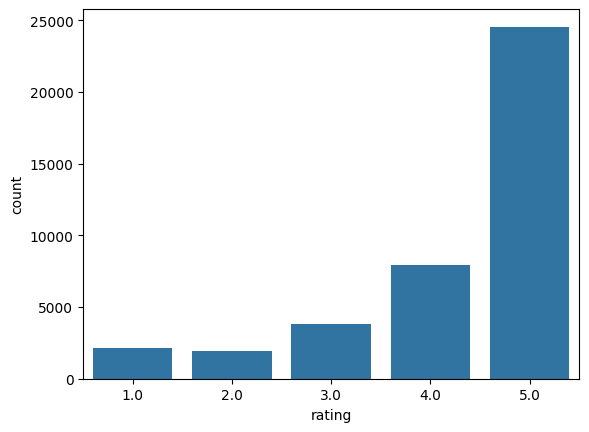

In [7]:
sns.countplot(x='rating',data=fake_reviews)

<Axes: xlabel='label', ylabel='count'>

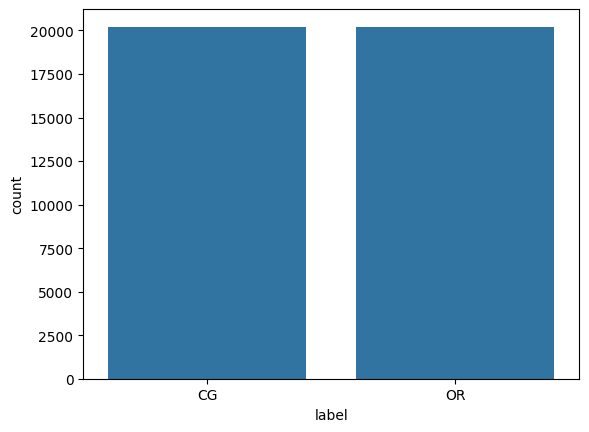

In [8]:
sns.countplot(x='label',data=fake_reviews)

<Axes: xlabel='category', ylabel='count'>

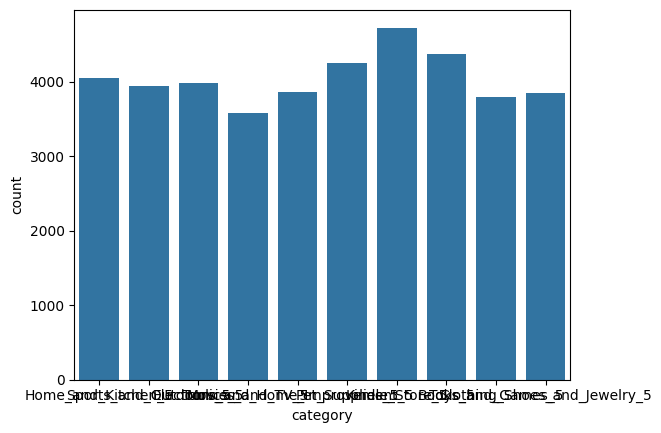

In [9]:
sns.countplot(x='category',data=fake_reviews)

In [10]:
fake_reviews['review_length'] = fake_reviews['text_'].apply(len)

<Axes: xlabel='review_length', ylabel='Count'>

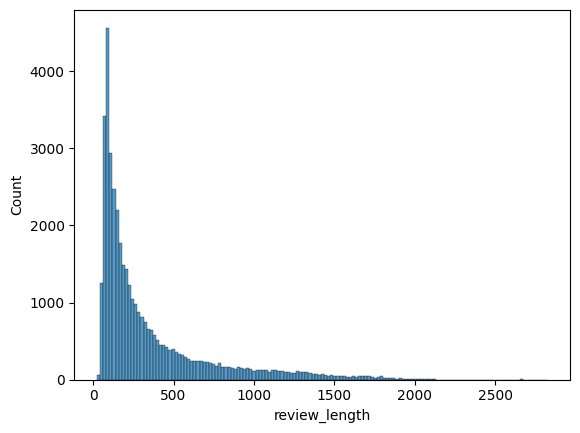

In [11]:
sns.histplot(fake_reviews['review_length'])

In [12]:
all_words = ' '.join(fake_reviews['text_']).split(' ')
most_common_words = Counter(all_words).most_common(20)
most_common_words

[('the', 125375),
 ('a', 94870),
 ('I', 91688),
 ('and', 86025),
 ('to', 67735),
 ('is', 63943),
 ('', 62066),
 ('it', 45646),
 ('of', 45107),
 ('for', 37686),
 ('this', 36631),
 ('in', 28095),
 ('The', 27962),
 ('was', 25895),
 ('that', 25464),
 ('with', 22811),
 ('have', 22712),
 ('my', 20354),
 ('very', 19073),
 ('are', 18901)]

### Preprocessing

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    #tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [16]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = fake_reviews['text_'].to_list()
target = fake_reviews['label'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

### Vectorization

In [17]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)
tfidf_data = tfidf_vectorizer.fit_transform(preprocessed_data)

In [18]:
# processed_df = pd.DataFrame(tfidf_data.toarray(),columns = tfidf_vectorizer.get_feature_names_out())

In [19]:
# processed_df['label'] = target

# Hyperparameter Tuning

In [20]:
%%capture
!pip install catboost
!pip install xgboost

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [13]:
seed = 42
X_train, X_test, y_train, y_test=train_test_split(tfidf_data,target,random_state=seed)

## Logistic Regression

In [ ]:
logistic_param_grid = { 'penalty' : ['l1', 'l2', 'none'],
                        'C' : np.logspace(-4, 4, 10),
                        'solver' : ['lbfgs','liblinear','sag'],
                        'max_iter' : [100, 200,500]
                        }

logistic_search = RandomizedSearchCV(LogisticRegression(), logistic_param_grid, n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)
logistic_search.fit(tfidf_data, target)

In [ ]:
logistic_search.best_params_

In [ ]:
logistic_search.best_score_

In [ ]:
logistic_param_grid = { 'penalty' : [ 'l2', 'none'],
                        'C' : np.logspace(-4, 4, 10),
                        'solver' : ['newton-cg'],
                        'max_iter' : [100, 200,500]
                        }

logistic_search = RandomizedSearchCV(LogisticRegression(), logistic_param_grid, n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)
logistic_search.fit(tfidf_data, target)

In [ ]:
logistic_search.best_params_

In [ ]:
logistic_search.best_score_

In [ ]:
logistic_param_grid = { 'penalty' : ['elasticnet', 'none'],
                        'C' : np.logspace(-4, 4, 10),
                        'solver' : ['saga'],
                        'max_iter' : [100, 200,500]
                        }

logistic_search = RandomizedSearchCV(LogisticRegression(), logistic_param_grid, n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)
logistic_search.fit(tfidf_data, target)

In [ ]:
logistic_search.best_params_

In [ ]:
logistic_search.best_score_

In [ ]:
  # log_reg =  LogisticRegression(C=4.2813,max_iter=100,penalty='l2',solver='lbfgs')
# log_reg.fit(X_train,y_train)

In [ ]:
# log_preds = log_reg.predict(X_test)
# f1_score(y_test,log_preds)

## Multinomial NB

In [ ]:
multinomial_param_grid = {
    'alpha': np.linspace(0, 1, 10),
    'fit_prior': [True, False]
}
multinomial_search = RandomizedSearchCV(MultinomialNB(), multinomial_param_grid, n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)
multinomial_search.fit(tfidf_data, target)

In [ ]:
multinomial_search.best_params_

In [ ]:
multinomial_search.best_score_

In [27]:
# nb = MultinomialNB(alpha=1,fit_prior=True)
# nb.fit(X_train,y_train)

In [28]:
# nb_preds = nb.predict(X_test)
# f1_score(y_test,nb_preds)

## SVC

In [22]:
param_grid_linear = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200,500]
}

param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10, 100]
}

search_linearsvc = RandomizedSearchCV(LinearSVC(dual=False), param_grid_linear,n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)
search_rbfsvc = RandomizedSearchCV(SVC(), param_grid_rbf, n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)

### Linear

In [30]:
search_linearsvc.fit(tfidf_data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=75. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line

ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

In [23]:
search_linearsvc.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
search_linearsvc.best_score_

### RBF

In [ ]:
search_rbfsvc.fit(tfidf_data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 35 is smaller than n_iter=75. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
search_rbfsvc.best_params_

In [ ]:
search_rbfsvc.best_score_

## Ensemble

In [ ]:
param_grid_et = {
    'n_estimators': [100, 200,500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

param_grid_xgb = {
    'n_estimators': [100, 200,500],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
}

param_grid_cb = {
    'iterations': [100, 200,500],
    'depth': [6, 10, 12],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],
}
param_grid_lbgm = {
    "n_estimators": [100, 200,500],
    "learning_rate": [0.1, 0.07, 0.03],
    "num_leaves": [ 40, 20, 35],
    "max_depth": [-1, 10],
    "boosting_type": ["gbdt", "goss"],
    "min_child_samples": [10, 15]
}

In [ ]:
np.random.seed(42)
et_clf = ExtraTreesClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
cb_clf = CatBoostClassifier(random_state=42, verbose=0)
lbgm_clf= LGBMClassifier(random_state=42)
# Initialize GridSearchCV for each classifier
grid_search_et = RandomizedSearchCV(et_clf, param_grid_et, n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)
grid_search_xgb = RandomizedSearchCV(xgb_clf, param_grid_xgb, n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)
grid_search_cb = RandomizedSearchCV(cb_clf, param_grid_cb, n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)
grid_search_lbgm = RandomizedSearchCV(lbgm_clf, param_grid_cb, n_iter=75, cv=5, scoring='precision', n_jobs=-1, random_state=42)

### Extra Trees

In [ ]:
grid_search_et.fit(tfidf_data, target)
print("Best parameters for Extra Trees:", grid_search_et.best_params_)

In [ ]:
grid_search_et.best_score_

In [ ]:
# et_ypreds = grid_search_et.best_estimator_.predict(X_test)
# f1_score(y_test,et_ypreds)

### XGB

In [ ]:
grid_search_xgb.fit(tfidf_data, target)
print("Best parameters for Extra Trees:", grid_search_xgb.best_params_)

In [ ]:
grid_search_xgb.best_score_

In [ ]:
# et_ypreds = grid_search_xgb.best_estimator_.predict(X_test)
# f1_score(np.where(y_test == -1, 0, y_test),et_ypreds)

### CatBoost

In [ ]:
grid_search_cb.fit(tfidf_data, target)
print("Best parameters for Extra Trees:", grid_search_cb.best_params_)

In [ ]:
grid_search_cb.best_score_

In [ ]:
# et_ypreds = grid_search_cb.best_estimator_.predict(X_test)
# f1_score(y_test,et_ypreds)

### LBGM

In [ ]:
grid_search_lbgm.fit(tfidf_data, target)
print("Best parameters for LBGM:", grid_search_lbgm.best_params_)

In [ ]:
grid_search_lbgm.best_score_

In [ ]:
# et_ypreds = grid_search_et.best_estimator_.predict(X_test)
# f1_score(y_test,et_ypreds)